In [1]:
import sys
import json

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly
plotly.io.orca.config.executable = "C:/Users/agrasso/Anaconda3/envs/covid19/orca_app/orca.exe"

path_root = '../..'
sys.path.append(f'{path_root}/')
from src.visualize.visualizer import ChoroplethMap

level = 'province'

path_data = f'{path_root}/data'
# Paths dependant on path_data
path_img = f'{path_data}/imgs/mappe/{level}'
path_csv = f'{path_data}/csv'
path_geojson = f'{path_data}/geojson'

csv_in_name = f'{path_csv}/covid19-{level}.csv'
geojson_province_name = f'{path_geojson}/Italy_NUTS_3.json'

In [2]:
# Read geojson NUTS 2 file
with open(geojson_province_name, encoding='utf-8') as geojson_province:
    json_province = json.load(geojson_province)
properties = json_province['features'][0]['properties']
properties

{'prov_name': 'Torino',
 'prov_istat_code_num': 1,
 'prov_acr': 'TO',
 'reg_name': 'Piemonte',
 'reg_istat_code': '01',
 'reg_istat_code_num': 1,
 'prov_istat_code': '001'}

In [3]:
df_p = pd.read_csv(csv_in_name)
last_date = df_p.data[0].split('T')[0]
# df_r.sort_values(by='codice_regione').reset_index(drop=True)
list(df_p.columns)

['data',
 'codice_regione',
 'denominazione_regione',
 'codice_provincia',
 'denominazione_provincia',
 'sigla_provincia',
 'totale_casi',
 'codice_nuts_1',
 'codice_nuts_2',
 'codice_nuts_3',
 'variazione_totale_casi']

In [4]:
# Define figures properties
fig_prop = {'title': last_date,
            'path_root': path_img,
            'variazione_totale_casi': {'colorbar_title': 'Variazione totale casi', 'file_name': 'variazione_totale_casi'},
            'totale_casi': {'colorbar_title': 'Totale casi', 'file_name': 'totale_casi'}}

In [5]:
# Construct object with dataframe and geojson data
cm = ChoroplethMap(df=df_p,
                   geo_map=json_province,
                   geo_col='codice_provincia',
                   geo_prop='properties.prov_istat_code_num',
                   fig_prop=fig_prop)

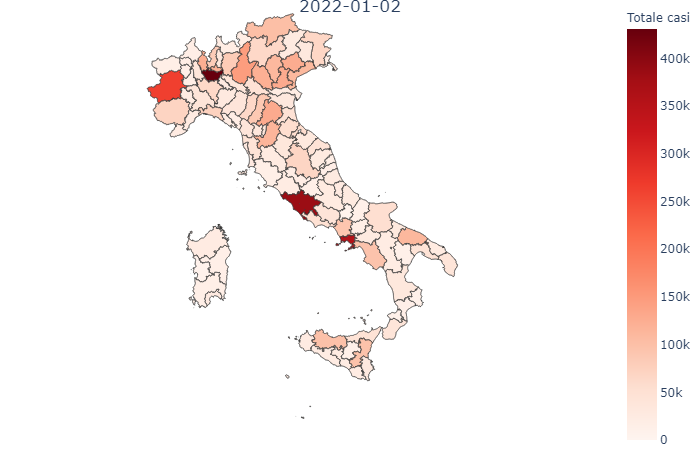

In [6]:
# Total positive cases
col = 'totale_casi'
fig = cm.draw_map(col=col)
cm.save(fig=fig, col=col)

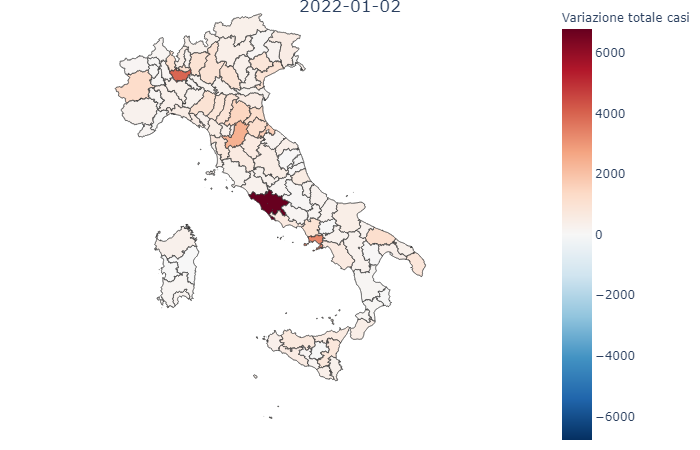

In [7]:
# Variation of total positive cases with respect to the day before
col = 'variazione_totale_casi'
fig = cm.draw_map(col=col, color={'type': 'seq', 'scale': 'RdBu'}, zmid=0, reversescale=True)
cm.save(fig=fig, col=col)